#Prepare Packages

##Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import Necessary Libraries

In [ ]:
#import non tensorflow libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from PIL import Image
import pathlib
import IPython.display as displayzz

#import tensorflow libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.utils import Sequence

In [ ]:
#Avoid OOM errors by setting GPU Memory Consumption Growth
#limiting the memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

#Train A New Model

##Import Images

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/IARA/IA/KaggleDataset')
data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()
data = data.map(lambda x, y: (x/255, y))

train_size = int(len(data)*.7)
val_size = int(len(data)*.3)

#test_size = int(len(data)*.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
#test = data.skip(train_size).skip(val_size).take(test_size)

Found 4200 files belonging to 2 classes.


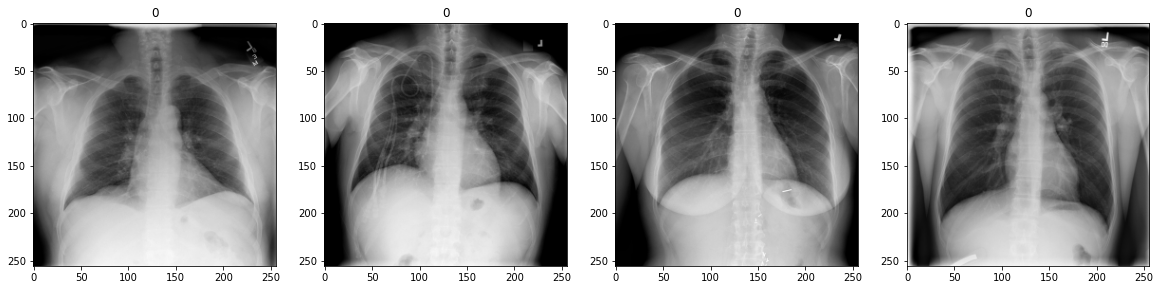

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
batch = data_iterator.next()

###2nd Import Method

In [ ]:
#prepare train data generator with necessary augmentations and validation split
train_datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.25
)

In [ ]:
#initialise train directory
data_dir_kaggle = '/content/drive/MyDrive/TuBerCulos/IA/CNN_Merged_DataSet'
data_dir_kaggle = pathlib.Path(data_dir_kaggle)

In [ ]:
#initialising necessary properties
BATCH_SIZE = 32
IMG_HEIGHT = 255
IMG_WIDTH = 255

#generate training data
print('Train Data')
train_data = train_datagen.flow_from_directory(
    str(data_dir_kaggle),
    batch_size=BATCH_SIZE,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'binary',
    subset='training')

#generate validation data
print('\nValidation Data')
valid_data = train_datagen.flow_from_directory(
    str(data_dir_kaggle),
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode = 'binary',
    subset='validation')

Train Data
Found 3494 images belonging to 2 classes.

Validation Data
Found 1164 images belonging to 2 classes.


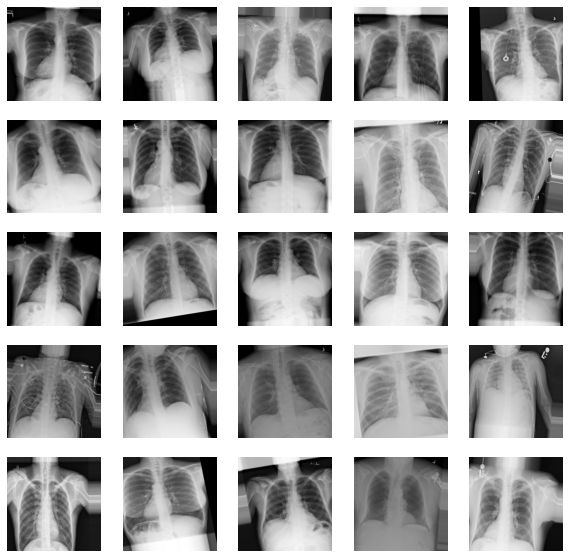

In [ ]:
def show_batch(image_batch, label_batch):
  fig = plt.figure(figsize=(10,10))
  fig.patch.set_facecolor('white')
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      #plt.title(CLASS_NAMES[label_batch[n]==1][0].title(), fontsize=14)
      plt.axis('off')
image_batch, label_batch = next(train_data)
show_batch(image_batch, label_batch)

##Define Model

In [ ]:
#Define Model
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
#model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)))
#taking the max value after relu and return it, it condenses the info
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#flattening the data to a single value
model.add(Flatten())

#dense layers (fully conected layers), 256 neurons, relu
model.add(Dense(256, activation='relu'))

#dense layer with just one output with sigmoid(value between 0 & 1, 
#0= normal | 1= tuberculosis)
model.add(Dense(1, activation='sigmoid'))

#Second Model, less efficient
"""
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(activation = 'relu', units = 128))
model.add(Dense(activation = 'relu', units = 64))
model.add(Dense(activation = 'sigmoid', units = 1))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
"""

'\nmodel = Sequential()\nmodel.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)))\nmodel.add(MaxPooling2D(pool_size = (2, 2)))\nmodel.add(Conv2D(32, (3, 3), activation="relu"))\nmodel.add(MaxPooling2D(pool_size = (2, 2)))\nmodel.add(Conv2D(32, (3, 3), activation="relu"))\nmodel.add(MaxPooling2D(pool_size = (2, 2)))\nmodel.add(Conv2D(64, (3, 3), activation="relu"))\nmodel.add(MaxPooling2D(pool_size = (2, 2)))\nmodel.add(Conv2D(64, (3, 3), activation="relu"))\nmodel.add(MaxPooling2D(pool_size = (2, 2)))\nmodel.add(Flatten())\nmodel.add(Dense(activation = \'relu\', units = 128))\nmodel.add(Dense(activation = \'relu\', units = 64))\nmodel.add(Dense(activation = \'sigmoid\', units = 1))\nmodel.compile(optimizer = \'adam\', loss = \'binary_crossentropy\', metrics = [\'accuracy\'])\n'

##Compile Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9), 
      loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), 
      metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 16)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


##Declare Callbacks

In [ ]:
epochs = 30
# Reduce learning rate when there is a change lesser than <min_delta> in <val_accuracy> for more than <patience> epochs
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 mode = 'max',
                                                 min_delta = 0.01,
                                                 patience = 3,
                                                 factor = 0.25,
                                                 verbose = 1,
                                                 cooldown = 0,
                                                 min_lr = 0.00000001)

In [ ]:
# Stop the training process when there is a change lesser than <min_delta> in
#<val_accuracy> for more than <patience> epochs
early_stopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 mode = 'max',
                                                 min_delta = 0.005,
                                                 patience = 10,
                                                 verbose = 1,
                                                 restore_best_weights = True)

##Fit Model

In [ ]:
#fit the model without augmentation
history = model.fit(train, epochs=epochs, validation_data=val, callbacks=[early_stopper, reduce_lr])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 1369s 15s/step - loss: 0.4571 - accuracy: 0.8305 - val_loss: 0.3946 - val_accuracy: 0.8365 - lr: 0.0010
Epoch 2/20
92/92 [==============================] - 52s 551ms/step - loss: 0.3619 - accuracy: 0.8370 - val_loss: 0.2745 - val_accuracy: 0.8862 - lr: 0.0010
Epoch 3/20
92/92 [==============================] - 52s 552ms/step - loss: 0.2643 - accuracy: 0.8937 - val_loss: 0.2683 - val_accuracy: 0.9103 - lr: 0.0010
Epoch 4/20
92/92 [==============================] - 53s 563ms/step - loss: 0.2233 - accuracy: 0.9130 - val_loss: 0.2749 - val_accuracy: 0.8934 - lr: 0.0010
Epoch 5/20
92/92 [==============================] - 52s 554ms/step - loss: 0.2312 - accuracy: 0.9073 - val_loss: 0.2110 - val_accuracy: 0.9255 - lr: 0.0010
Epoch 6/20
92/92 [==============================] - 52s 549ms/step - loss: 0.2100 - accuracy: 0.9188 - val_loss: 0.2602 - val_accuracy: 0.9030 - lr: 0.0010
Epoch 7/20
92/92 [==============================] - 52s 551ms/step - loss: 

In [ ]:
#fit model with augmentation
history = model.fit(train_data, epochs=epochs, validation_data=valid_data, callbacks=[early_stopper, reduce_lr])

Epoch 1/30
110/110 [==============================] - 160s 1s/step - loss: 0.5064 - accuracy: 0.7642 - val_loss: 0.5189 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/30
110/110 [==============================] - 157s 1s/step - loss: 0.3620 - accuracy: 0.8386 - val_loss: 0.5134 - val_accuracy: 0.7663 - lr: 0.0010
Epoch 3/30
110/110 [==============================] - 158s 1s/step - loss: 0.3415 - accuracy: 0.8629 - val_loss: 0.6065 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/30
110/110 [==============================] - 155s 1s/step - loss: 0.3061 - accuracy: 0.8798 - val_loss: 0.5630 - val_accuracy: 0.7595 - lr: 0.0010
Epoch 5/30
110/110 [==============================] - ETA: 0s - loss: 0.2800 - accuracy: 0.8890
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
110/110 [==============================] - 154s 1s/step - loss: 0.2800 - accuracy: 0.8890 - val_loss: 0.4712 - val_accuracy: 0.7758 - lr: 0.0010
Epoch 6/30
110/110 [==============================] - 154s 

##View Loss And Accuracy

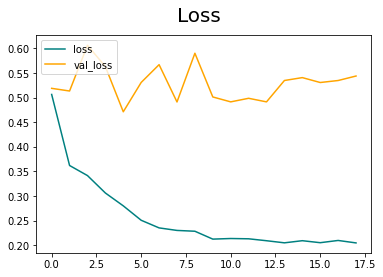

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

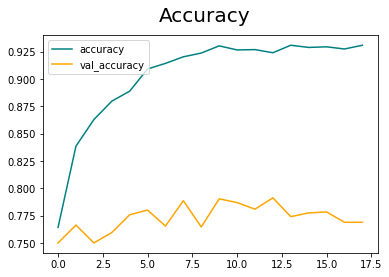

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

##Save New Model

In [ ]:
#save model
model.save('TBC_CNN_Fusion_NewLayers.h5')

In [ ]:
#Save augemented model
model.save('TBC_CNN_Fusiom_MontKaggleShenzen_PreLayers.h5')

#Load Previous Model

In [ ]:
from tensorflow import keras

#new_model = keras.models.load_model('/content/drive/MyDrive/TuBerCulos/IA/Convolutional Neural Network/Trained_Models/TBC_CNN_Fusion_AugementedData.h5')
#new_model.summary()

new_model_AUG = keras.models.load_model('/content/drive/MyDrive/IARA/IA/Convolutional Neural Network/Trained_Models/TBC_CNN_Fusion_AugementedData.h5')

#Test With Image

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   plt.imshow(np_image, cmap = 'gray')
   plt.xticks([])
   plt.yticks([])
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (256, 256, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

NameError: ignored

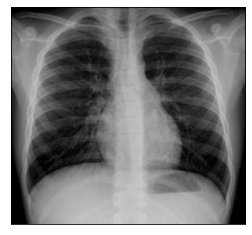

In [ ]:
#Load Image for Testing
test_image = load('/content/drive/MyDrive/IARA/IA/MiniTestDataSet/NORMAL/radiografia_de_torax_-_imagen_-.jpg')

#Predict with NonAugmented and Augmented
print("OLD Model: " , new_model.predict(test_image) , "\nNEW Model: ", model.predict(test_image))
#print("nAugemented Model: ", model.predict(test_image))

In [ ]:
#selecting an image and adding filters?
img = cv2.imread('/content/radiografia_de_torax_-_imagen_-.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#resizing the image
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
#wrapping it in another set of arrays
np.expand_dims(resize, 0).shape
#predicting
yhat = new_model.predict(np.expand_dims(resize/255, 0))
yhat

In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/IARA/IA/IndianaTest')
#for classification problems
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
#for each batch it unpacks it and makes predictions and then it updates
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = new_model_AUG.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Found 155 files belonging to 2 classes.
Precision:1.0, Recall:0.025641025975346565, Accuracy:0.5145833492279053
